In [38]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import torch
from dcgan import Discriminator, Generator

# Determine the number of GPUs
num_gpu = 1 if torch.cuda.is_available() else 0

# Load the models
D = Discriminator(ngpu=num_gpu).eval()
G = Generator(ngpu=num_gpu).eval()

# Load weights
D_path = 'weights/netD_epoch_99.pth'
G_path = 'weights/netG_epoch_99.pth'

# Specify map_location to load on CPU
if torch.cuda.is_available():
    D.load_state_dict(torch.load(D_path))
    G.load_state_dict(torch.load(G_path))
else:
    D.load_state_dict(torch.load(D_path, map_location=torch.device('cpu')))
    G.load_state_dict(torch.load(G_path, map_location=torch.device('cpu')))

# Move models to GPU if available
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

## Generate some images

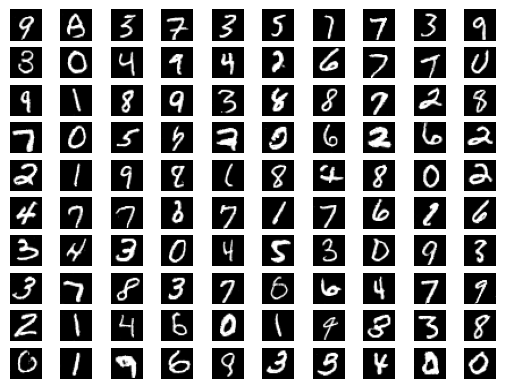

In [47]:
batch_size = 100
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)

# z = torch.randn(batch_size, latent_size).cuda()
# z = Variable(z)
# fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)
R, C = 10, 10
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], cmap='gray')
    plt.grid(False);
    plt.axis('off')
plt.show();

## Save images into folder and compress

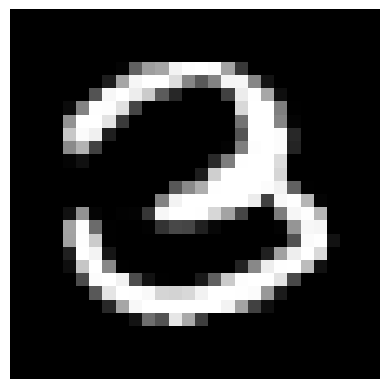

In [42]:
plt.imshow(image, cmap='gray')
plt.grid(False);
plt.axis('off')
plt.savefig('image_test.png', bbox_inches='tight', pad_inches=0)
plt.show()